In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
import datetime
from sklearn.ensemble import RandomForestClassifier
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from xgboost import XGBClassifier


In [134]:
#from google.colab import files
#uploaded = files.upload()

In [135]:
train_data = pd.read_csv("/content/train_csv.csv")
test_data = pd.read_csv("/content/test.csv.csv")
sample_submission_data = pd.read_csv("/content/sample_submission.csv")

In [136]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [137]:
train_data.shape


(614, 13)

In [138]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## data cleaning

In [139]:
#CHECKING consistency of the dataset
train_data.dtypes


,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [140]:
 #finding the number of missing values
 train_data.isna().sum()


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [141]:
#Here we will fill the null values of the variables LoanAmount and Loan_Amount_Term with the Mean¶
train_data['LoanAmount']=train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean())
train_data['Loan_Amount_Term']=train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mean())

In [142]:
#filling categorical data with the mode
train_data['Gender']=train_data['Gender'].fillna(train_data['Gender'].mode()[0])
train_data['Married']=train_data['Married'].fillna(train_data['Married'].mode()[0])
train_data['Dependents']=train_data['Dependents'].fillna(train_data['Dependents'].mode()[0])
train_data['Self_Employed']=train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])
train_data['Credit_History']=train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0])


In [143]:
train_data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y


<ipython-input-144-3bb8cf4857dc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Gender', palette = 'Set2', data = train_data)
<ipython-input-144-3bb8cf4857dc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Married', palette = 'Set2', data = train_data)
<ipython-input-144-3bb8cf4857dc>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Dependents', palette = 'Set2', data = train_data)
<ipython-input-144-3bb8cf4857dc>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.

<Axes: xlabel='Credit_History', ylabel='count'>

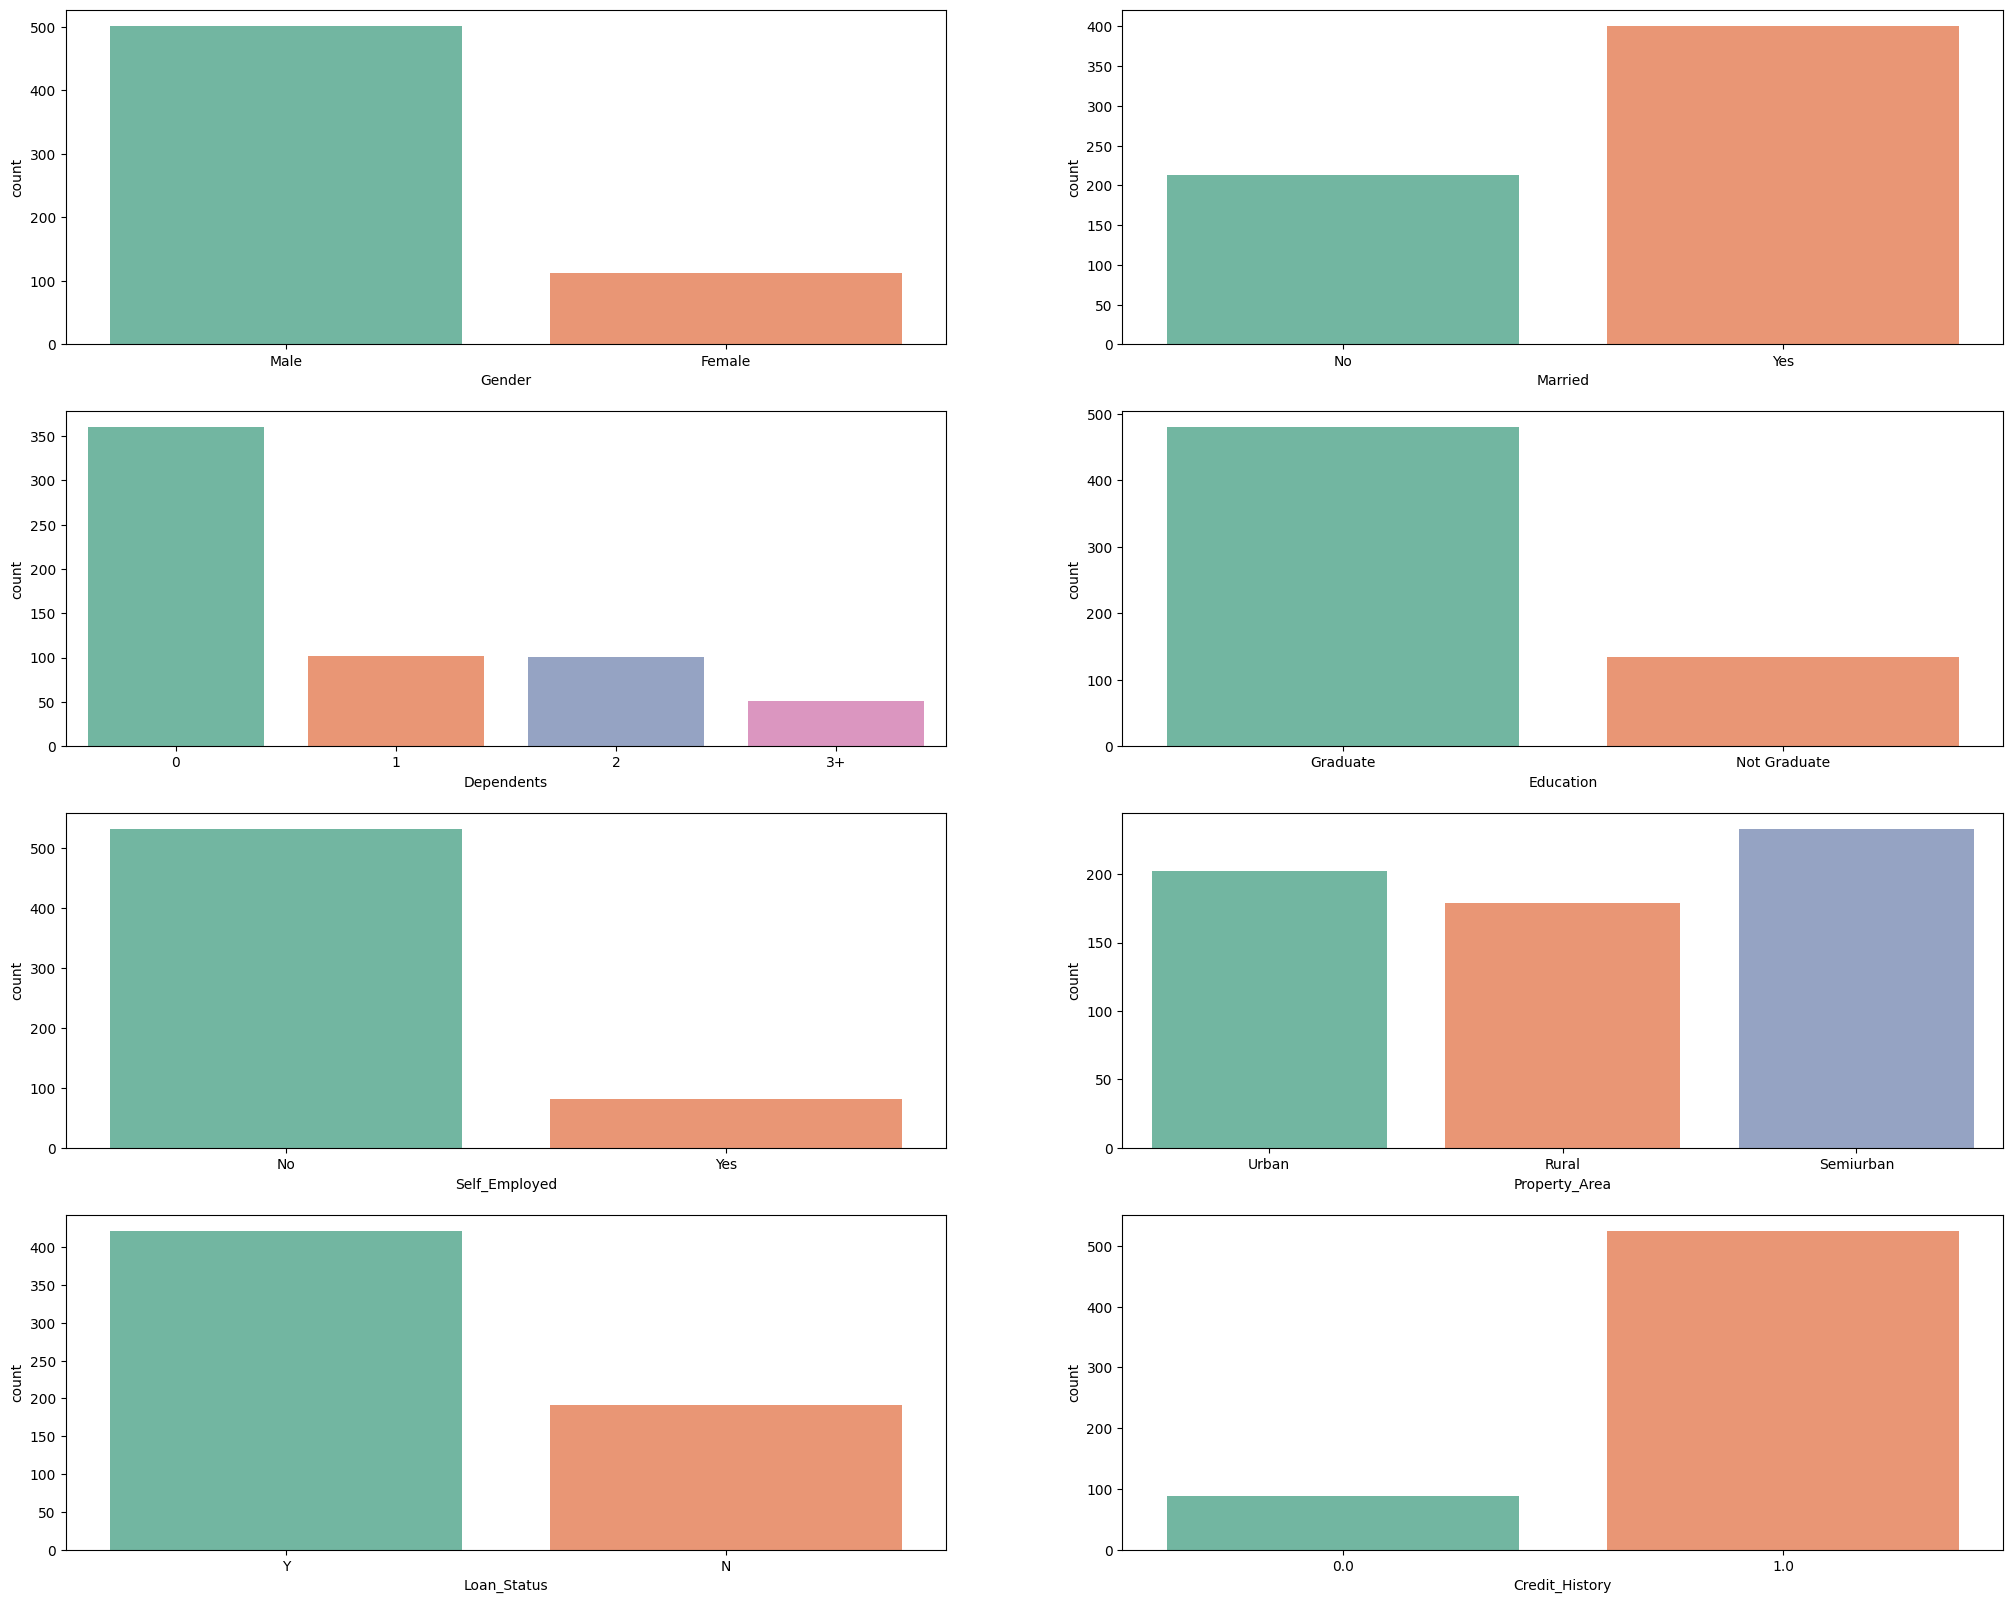

In [144]:
plt.figure(figsize = (25,20))

plt.subplot(4,2,1)
sns.countplot(x = 'Gender', palette = 'Set2', data = train_data)

plt.subplot(4,2,2)
sns.countplot(x = 'Married', palette = 'Set2', data = train_data)

plt.subplot(4,2,3)
sns.countplot(x = 'Dependents', palette = 'Set2', data = train_data)

plt.subplot(4,2,4)

sns.countplot(x = 'Education', palette = 'Set2', data = train_data)

plt.subplot(4,2,5)
sns.countplot(x = 'Self_Employed', palette = 'Set2', data = train_data)

plt.subplot(4,2,6)
sns.countplot(x = 'Property_Area', palette = 'Set2', data = train_data)

plt.subplot(4,2,7)
sns.countplot(x = 'Loan_Status', palette = 'Set2', data = train_data)

plt.subplot(4,2,8)
sns.countplot(x = 'Credit_History', palette = 'Set2', data = train_data)



# DETECTING AND HANDLING OUTLIERS

<Axes: xlabel='ApplicantIncome'>

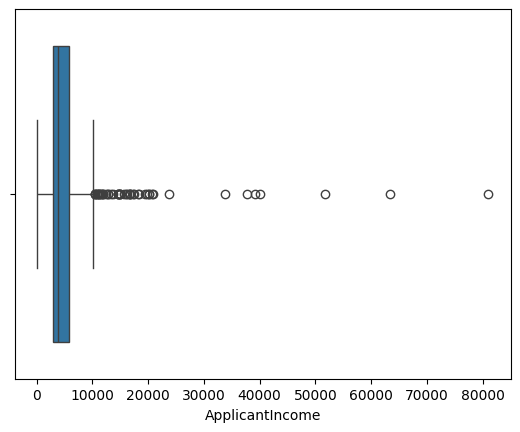

In [145]:
#detecting outliers
sns.boxplot(x=train_data["ApplicantIncome"])


In [146]:
print(train_data['ApplicantIncome'].quantile(0.10))
print(train_data['ApplicantIncome'].quantile(0.90))



2216.1
9459.900000000007


In [147]:
train_data["ApplicantIncome"] = np.where(train_data["ApplicantIncome"] <2216.1, 2216.1,train_data['ApplicantIncome'])
train_data["ApplicantIncome"] = np.where(train_data["ApplicantIncome"] >9459.90000, 9459.90000,train_data['ApplicantIncome'])
print(train_data['ApplicantIncome'].skew())


1.0177280847006949


<Axes: xlabel='ApplicantIncome'>

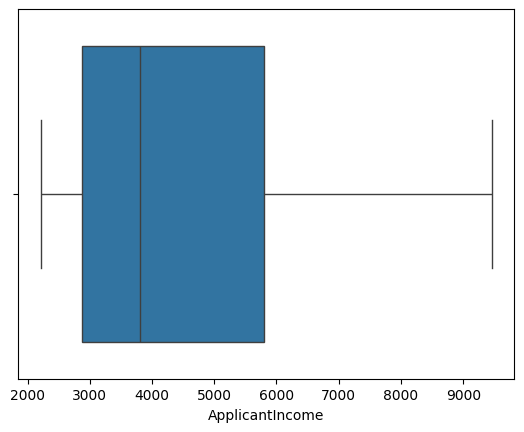

In [148]:
#confirming no  outliers
sns.boxplot(x=train_data["ApplicantIncome"])


In [149]:
#Descriptive statistics
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,4599.164495,1621.245798,146.412162,342.000000,0.855049
std,2281.072440,2926.248369,84.037468,64.372489,0.352339
min,2216.100000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,9459.900000,41667.000000,700.000000,480.000000,1.000000


## Data processing

In [150]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.preprocessing import LabelEncoder
label_encoder_Gender = LabelEncoder()
label_encoder_Married = LabelEncoder()
label_encoder_Dependents = LabelEncoder()
label_encoder_Education = LabelEncoder()
label_encoder_Self_Employed = LabelEncoder()
label_encoder_Property_Area = LabelEncoder()
label_encoder_Loan_Status = LabelEncoder()

In [151]:
label_encoder = LabelEncoder()
train_data['Loan_Status'] = label_encoder.fit_transform(train_data['Loan_Status'])
scaler = StandardScaler()



In [152]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [153]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_data['Gender'] = le.fit_transform(train_data['Gender'])
train_data['Loan_Status'] = le.fit_transform(train_data['Loan_Status'])
train_data['Married'] = le.fit_transform(train_data['Married'])
train_data['Education'] = le.fit_transform(train_data['Education'])
train_data['Self_Employed'] = le.fit_transform(train_data['Self_Employed'])
train_data['Property_Area'] = le.fit_transform(train_data['Property_Area'])
train_data['Dependents'] = le.fit_transform(train_data['Dependents'])


In [154]:
train_data = train_data.drop('Loan_ID', axis=1)
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.000000,360.0,1.0,2,1


In [155]:
#scaling
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data.drop('Loan_Status', axis=1))


# Split into training and validation sets


In [156]:
X_train, X_val, y_train, y_val = train_test_split(train_data_scaled, train_data['Loan_Status'], test_size=0.2, random_state=42)


##  A model training step to select the best machine learning algorithm and tune its hyperparameters.


In [157]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Define models and their hyperparameter grids
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC()
}

param_grids = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10]},
    "Random Forest": {"n_estimators": [100, 200, 300], "max_depth": [None, 5, 10]},
    "Gradient Boosting": {"n_estimators": [100, 200, 300], "learning_rate": [0.1, 0.05, 0.01]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
}

# Evaluate each model using cross-validation
results = {}
for model_name, model in models.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    results[model_name] = grid_search.best_score_

# Find the best model
best_model = max(results, key=results.get)
print("Best Model:", best_model)
print("Best Score:", results[best_model])

# Train the best model on the entire training set


Best Model: Logistic Regression
Best Score: 0.8145949288806431


**logistic regression**

In [158]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

# Evaluate the model on validation set


---



In [159]:
from sklearn.metrics import accuracy_score


In [160]:
# Evaluate the model on validation set
y_pred_val = logistic.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_val)
print("Accuracy:", accuracy)
print(classification_report(y_val, y_pred_val))


Accuracy: 0.7886178861788617
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [161]:
# Evaluate on validation set
val_accuracy = accuracy_score(y_val, y_pred_val)
val_precision = precision_score(y_val, y_pred_val)
val_recall = recall_score(y_val, y_pred_val)
val_f1 = f1_score(y_val, y_pred_val)
val_confusion_matrix = confusion_matrix(y_val, y_pred_val)


In [162]:
print("\nValidation Set:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)
print("Confusion matrix:\n", val_confusion_matrix)


Validation Set:
Accuracy: 0.7886178861788617
Precision: 0.7596153846153846
Recall: 0.9875
F1-score: 0.8586956521739131
Confusion matrix:
 [[18 25]
 [ 1 79]]


# preproces the test dataset

In [163]:
test_data.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [164]:
#Here we will fill the null values of the variables LoanAmount and Loan_Amount_Term with the Mean¶
test_data['LoanAmount']=test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean())
test_data['Loan_Amount_Term']=test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mean())

In [165]:
#filling categorical data with the mode
test_data['Gender']=train_data['Gender'].fillna(test_data['Gender'].mode()[0])

test_data['Dependents']=test_data['Dependents'].fillna(test_data['Dependents'].mode()[0])

test_data['Self_Employed']=test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0])
test_data['Credit_History']=test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0])


In [166]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,1,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,1,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,1,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,1,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [167]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
test_data['Gender'] = le.fit_transform(test_data['Gender'])
#test_data['Loan_Status'] = le.fit_transform(test_data['Loan_Status'])
test_data['Married'] = le.fit_transform(test_data['Married'])
test_data['Education'] = le.fit_transform(test_data['Education'])
test_data['Self_Employed'] = le.fit_transform(test_data['Self_Employed'])
test_data['Property_Area'] = le.fit_transform(test_data['Property_Area'])
test_data['Dependents'] = le.fit_transform(test_data['Dependents'])

In [168]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


# Make predictions on test data


In [169]:
test_data = test_data.drop('Loan_ID', axis=1)

In [170]:
test_data_scaled = scaler.transform(test_data)
y_pred_test = logistic.predict(test_data_scaled)

In [171]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Make predictions on test data
y_pred_test = logistic.predict(test_data_scaled)

In [172]:
y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

# # Create submission file


In [173]:
_test_data = pd.read_csv("/content/test.csv.csv")


In [174]:
submission = pd.DataFrame({'id': _test_data['Loan_ID'], 'Loan_Status': y_pred_test})
submission.to_csv('submission.csv', index=False)

In [178]:
coefs = logistic.coef_[0]
coefs_abs = np.abs(coefs)

In [181]:
feature_importance = pd.DataFrame({'Feature': test_data.columns, 'Importance': coefs_abs})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

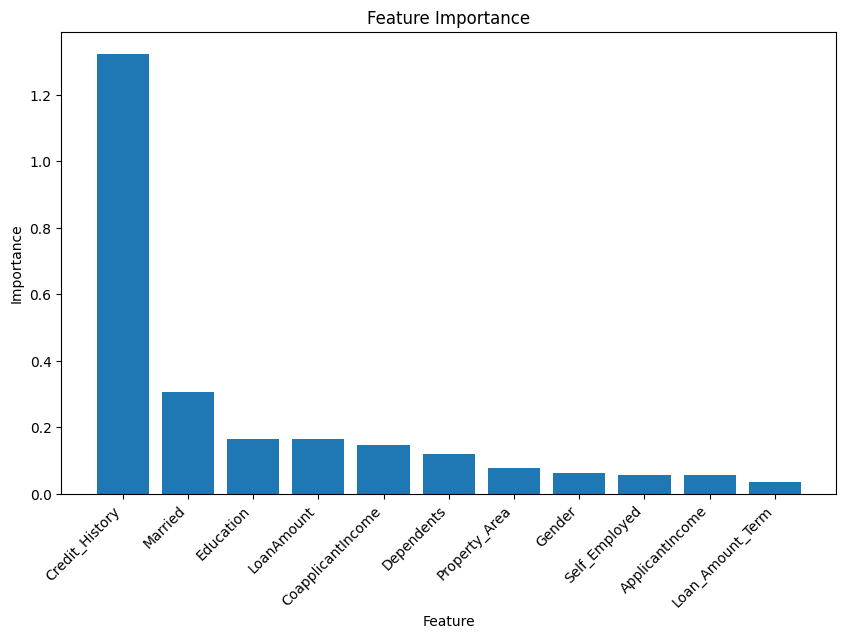

In [182]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

In [183]:
feature_importance

,Feature,Importance
9,Credit_History,1.323052
1,Married,0.307594
3,Education,0.166883
7,LoanAmount,0.164238
6,CoapplicantIncome,0.147973
2,Dependents,0.120986
10,Property_Area,0.076807
0,Gender,0.064056
4,Self_Employed,0.058608
5,ApplicantIncome,0.057096
